In [11]:
%load_ext autoreload
%autoreload 2

import warnings
import pandas as pd
import numpy as np
import os
import sys # error msg, add the modules
import operator # sorting
from math import *
import matplotlib.pyplot as plt

sys.path.append('../../')

from ModelParam import *
from read_trace import *
import cuda_timeline

# import read_trace
# from avgblkmodel import *


# import cke
# from df_util import *
#from model_cke import *

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# gpu info

In [12]:
gtx950 = DeviceInfo()
gtx950.sm_num = 6
gtx950.sharedmem_per_sm = 49152
gtx950.reg_per_sm = 65536
gtx950.maxthreads_per_sm = 2048

# single stream info

In [13]:
trace_file = '1stream_23000.csv'
df_trace = Trace2dataframe(trace_file) # read the trace to the dataframe

In [14]:
#df_trace

In [15]:
# extract kernel info
streaminfo = Get_stream_info(df_trace)
# print('streams : {}'.format(len(streaminfo)))
# print len(streaminfo[0].kernel)
# print len(streaminfo[0].kernel_info)

current_kern_info = streaminfo[0].kernel_info[0]
grid_dim = float(current_kern_info.grid_x) * float(current_kern_info.grid_y) * float(current_kern_info.grid_z)
block_dim = float(current_kern_info.blk_x) * float(current_kern_info.blk_y) * float(current_kern_info.blk_z)
reg_per_thread = float(current_kern_info.regs_per_thread)
sm_per_blk = float(current_kern_info.sm_per_block)

# kernel runtime in ms
current_kern =  streaminfo[0].kernel[0]
kern_runtime_ms = float(current_kern.end_time_ms) - float(current_kern.start_time_ms)

kernel = KernelInfo()
kernel.blockDim = block_dim
kernel.gridDim = grid_dim
kernel.reg_per_thread = reg_per_thread
kernel.sharedmem_per_blk = sm_per_blk
kernel.runtime_ms = kern_runtime_ms

kernel.avg_blk_time = AvgBlkTime(gtx950, kernel)

In [139]:
kernel_num = 2
kernels = [kernel for i in range(kernel_num)]

pred_cke_time, kernels_start_end = cke.model_cke_from_same_kernel(gtx950, kernels)

In [144]:
pred_cke_time

0.1139220000000023

In [145]:
kernels_start_end

[[0.0, 0.05696100000000115], [0.028480500000000575, 0.1139220000000023]]

In [140]:
# df_single_stream = read_trace.get_timing(df_trace)

In [141]:
# df_single_stream

In [142]:
# df_s1 = read_trace.reset_starting(df_single_stream)

In [143]:
# df_s1

In [34]:
#
#
#

# 2 stream info

In [4]:
# 10M for mem_mem : where the h2d between streams are overlapped

trace_file_2cke = '2stream_kern_ovlp_23000.csv'
df_trace_2cke = read_trace.trace2dataframe(trace_file_2cke)

In [5]:
df_trace

Start   Duration  Grid X  Grid Y  Grid Z  Block X  Block Y  Block Z  \
0          ms         us     NaN     NaN     NaN      NaN      NaN      NaN   
1  588.507525  16.641000     NaN     NaN     NaN      NaN      NaN      NaN   
2  588.525606  16.128000     NaN     NaN     NaN      NaN      NaN      NaN   
3  588.708136  56.961000    90.0     1.0     1.0    256.0      1.0      1.0   
4  588.770761  15.905000     NaN     NaN     NaN      NaN      NaN      NaN   

   Registers Per Thread Static SMem Dynamic SMem       Size Throughput  \
0                   NaN           B            B         KB       GB/s   
1                   NaN         NaN          NaN  89.843750   5.148830   
2                   NaN         NaN          NaN  89.843750   5.312604   
3                  28.0           0            0        NaN        NaN   
4                   NaN         NaN          NaN  89.843750   5.387091   

                Device  Context  Stream  \
0                  NaN      NaN     NaN   
1  GeForce GTX 950 (0)      1.0    13.0   
2  GeForce GTX 950 (0)      1.0    13.0   
3  GeForce GTX 950 (0)      1.0    13.0   
4  GeForce GTX 950 (0)      1.0    13.0   

                                                Name  
0                                                NaN  
1                                 [CUDA memcpy HtoD]  
2                                 [CUDA memcpy HtoD]  
3  kernel_vectorAdd(float const *, float const *,...  
4                                 [CUDA memcpy DtoH]

/home/leiming/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1292: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/leiming/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1297: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


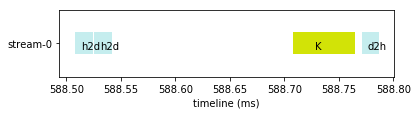

In [6]:
cuda_timeline.plot_trace(df_trace)

In [7]:
df_trace_2cke

Start   Duration  Grid X  Grid Y  Grid Z  Block X  Block Y  Block Z  \
0          ms         us     NaN     NaN     NaN      NaN      NaN      NaN   
1  806.383704  16.704000     NaN     NaN     NaN      NaN      NaN      NaN   
2  806.401624  16.417000     NaN     NaN     NaN      NaN      NaN      NaN   
3  806.419321  16.576000     NaN     NaN     NaN      NaN      NaN      NaN   
4  806.437113  20.993000     NaN     NaN     NaN      NaN      NaN      NaN   
5  806.716992  69.089000    90.0     1.0     1.0    256.0      1.0      1.0   
6  806.755233  73.793000    90.0     1.0     1.0    256.0      1.0      1.0   
7  806.788705  15.937000     NaN     NaN     NaN      NaN      NaN      NaN   
8  806.832162  15.873000     NaN     NaN     NaN      NaN      NaN      NaN   

   Registers Per Thread Static SMem Dynamic SMem       Size Throughput  \
0                   NaN           B            B         KB       GB/s   
1                   NaN         NaN          NaN  89.843750   5.129411   
2                   NaN         NaN          NaN  89.843750   5.219082   
3                   NaN         NaN          NaN  89.843750   5.169020   
4                   NaN         NaN          NaN  89.843750   4.081440   
5                  28.0           0            0        NaN        NaN   
6                  28.0           0            0        NaN        NaN   
7                   NaN         NaN          NaN  89.843750   5.376274   
8                   NaN         NaN          NaN  89.843750   5.397951   

                Device  Context  Stream  \
0                  NaN      NaN     NaN   
1  GeForce GTX 950 (0)      1.0    13.0   
2  GeForce GTX 950 (0)      1.0    13.0   
3  GeForce GTX 950 (0)      1.0    14.0   
4  GeForce GTX 950 (0)      1.0    14.0   
5  GeForce GTX 950 (0)      1.0    13.0   
6  GeForce GTX 950 (0)      1.0    14.0   
7  GeForce GTX 950 (0)      1.0    13.0   
8  GeForce GTX 950 (0)      1.0    14.0   

                                                Name  
0                                                NaN  
1                                 [CUDA memcpy HtoD]  
2                                 [CUDA memcpy HtoD]  
3                                 [CUDA memcpy HtoD]  
4                                 [CUDA memcpy HtoD]  
5  kernel_vectorAdd(float const *, float const *,...  
6  kernel_vectorAdd(float const *, float const *,...  
7                                 [CUDA memcpy DtoH]  
8                                 [CUDA memcpy DtoH]

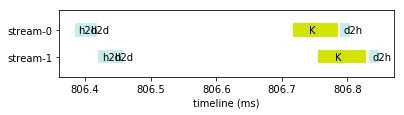

In [8]:
cuda_timeline.plot_trace(df_trace_2cke)

# 1cke - read trace and reset the timeline

In [9]:
df_single_stream = read_trace.get_timing(df_trace)

In [10]:
df_single_stream

stream api_type       start         end      size  duration
0     0.0      h2d  588.507525  588.524166  89.84375  0.016641
1     0.0      h2d  588.525606  588.541734  89.84375  0.016128
2     0.0     kern  588.708136  588.765097   0.00000  0.056961
3     0.0      d2h  588.770761  588.786666  89.84375  0.015905

In [11]:
df_s1 = read_trace.reset_starting(df_single_stream)

In [12]:
df_s1

stream api_type     start       end      size  duration
0     0.0      h2d  0.000000  0.016641  89.84375  0.016641
1     0.0      h2d  0.018081  0.034209  89.84375  0.016128
2     0.0     kern  0.200611  0.257572   0.00000  0.056961
3     0.0      d2h  0.263236  0.279141  89.84375  0.015905

In [13]:
tot_runtime = read_trace.getTotalRuntime(df_s1)
print tot_runtime

0.279141


### 2cke case

In [14]:
df_2stream = read_trace.get_timing(df_trace_2cke)

In [15]:
df_2stream

stream api_type       start         end      size  duration
0     0.0      h2d  806.383704  806.400408  89.84375  0.016704
1     0.0      h2d  806.401624  806.418041  89.84375  0.016417
2     0.0     kern  806.716992  806.786081   0.00000  0.069089
3     0.0      d2h  806.788705  806.804642  89.84375  0.015937
4     1.0      h2d  806.419321  806.435897  89.84375  0.016576
5     1.0      h2d  806.437113  806.458106  89.84375  0.020993
6     1.0     kern  806.755233  806.829026   0.00000  0.073793
7     1.0      d2h  806.832162  806.848035  89.84375  0.015873

In [16]:
tot_runtime = read_trace.getTotalRuntime(df_2stream)
print tot_runtime

0.464331


# 2 cke

In [17]:
stream_num = 2

# find when to start the stream and update the starting pos for the trace
H2D_H2D_OVLP_TH = 3.158431

df_cke_list = cke.init_trace_list(df_s1, stream_num = stream_num, h2d_ovlp_th = H2D_H2D_OVLP_TH)

In [18]:
df_cke_list[0]

stream api_type     start       end      size  duration
0       0      h2d  0.000000  0.016641  89.84375  0.016641
1       0      h2d  0.018081  0.034209  89.84375  0.016128
2       0     kern  0.200611  0.257572   0.00000  0.056961
3       0      d2h  0.263236  0.279141  89.84375  0.015905

In [19]:
df_cke_list[1]

stream api_type     start       end      size  duration
0       1      h2d  0.036209  0.052850  89.84375  0.016641
1       1      h2d  0.054290  0.070418  89.84375  0.016128
2       1     kern  0.236820  0.293781   0.00000  0.056961
3       1      d2h  0.299445  0.315350  89.84375  0.015905

### sort

In [20]:
df_all_api = cke.init_sort_api_with_extra_cols(df_cke_list)

In [21]:
df_all_api

start       end api_type   size_kb  stream_id status           bw  \
0  0.000000  0.016641      h2d  89.84375        0.0  sleep  5398.939367   
1  0.018081  0.034209      h2d  89.84375        0.0  sleep  5570.669023   
4  0.036209  0.052850      h2d  89.84375        1.0  sleep  5398.939367   
5  0.054290  0.070418      h2d  89.84375        1.0  sleep  5570.669023   
2  0.200611  0.257572     kern   0.00000        0.0  sleep     0.000000   
6  0.236820  0.293781     kern   0.00000        1.0  sleep     0.000000   
3  0.263236  0.279141      d2h  89.84375        0.0  sleep  5648.773970   
7  0.299445  0.315350      d2h  89.84375        1.0  sleep  5648.773970   

   bytes_done  bytes_left  current_pos  time_left  pred_end  
0         0.0    89.84375          0.0        0.0       0.0  
1         0.0    89.84375          0.0        0.0       0.0  
4         0.0    89.84375          0.0        0.0       0.0  
5         0.0    89.84375          0.0        0.0       0.0  
2         0.0     0.00000          0.0        0.0       0.0  
6         0.0     0.00000          0.0        0.0       0.0  
3         0.0    89.84375          0.0        0.0       0.0  
7         0.0    89.84375          0.0        0.0       0.0

In [22]:
#
# run above

### start algo

In [23]:
count = 0
break_count = 5

while not cke.AllDone(df_all_api):
    count = count + 1
    #-----------------------
    # pick two api to model 
    #-----------------------
    df_all_api, r1, r2 = cke.PickTwo(df_all_api)
    
#     if count == break_count: break

    #-----------------------
    # check the last api or not 
    #-----------------------
    last_api = False
    if r1 == None and r2 == None:
        last_api = True
        
    if last_api == True:                          # go directly updating the last wake api
        df_all_api = cke.UpdateStream_lastapi(df_all_api)
        break
    
    
    #-----------------------
    # move the current_pos to the starting of coming api r2, and update r1 status
    #-----------------------
    df_all_api = cke.StartNext_byType(df_all_api, [r1, r2])   
#     if count == break_count: break

    #-----------------------------
    # if one call is done, continue the next round
    #-----------------------------
    if cke.CheckRowDone(df_all_api, r1, r2):
        continue
        
#     if count == break_count: break
        
    #-----------------------------
    # when all calls are active
    #-----------------------------
    
    #-----------------------------
    # check whether the two calls are kerns, if yes
    #-----------------------------
    whichType = cke.CheckType(df_all_api, r1, r2) # check whether the same api
    if whichType == None:
        df_all_api = cke.Predict_noConflict(df_all_api, r1, r2)
    elif whichType in ['h2d', 'd2h']: # data transfer in the same direction
        df_all_api = cke.Predict_transferOvlp(df_all_api, r1, r2, ways = 2.0)
    else: # concurrent kernel: todo
        print('run cke model')
        cke.FindStreamAndKernID(df_all_api, r1)
    
    if count == break_count: break
        
        

    # check any of r1 and r2 has status done. if done, go to next 

    

#         if count == break_count:
#             break



#     if count == break_count:
#         break

    rangeT = cke.Get_pred_range(df_all_api)
#         print rangeT

#     if count == break_count:
#         break

    extra_conc = cke.Check_cc_by_time(df_all_api, rangeT) # check whether there is conc during the rangeT

    if extra_conc == 0:
        if whichType in ['h2d', 'd2h']:
            df_all_api = cke.Update_wake_transferOvlp(df_all_api, rangeT, ways = 2.0)
        elif whichType == 'kern':
            pass
        else: # no overlapping
            df_all_api = cke.Update_wake_noConflict(df_all_api, rangeT)

        # check if any api is done, and update the timing for the other apis in that stream
        df_all_api = cke.UpdateStreamTime(df_all_api)

    else: # todo : when there is additional overlapping
        pass

#         if count == break_count:
#             break
        


row:0 row:1
row:1 row:4
row:4 row:5
row:5 row:2
row:2 row:6
run cke model


In [24]:
df_all_api

start       end api_type   size_kb  stream_id status           bw  \
0  0.000000  0.016641      h2d  89.84375        0.0   done  5398.939367   
1  0.018081  0.034209      h2d  89.84375        0.0   done  5570.669023   
4  0.036209  0.052850      h2d  89.84375        1.0   done  5398.939367   
5  0.054290  0.070418      h2d  89.84375        1.0   done  5570.669023   
2  0.200611  0.257572     kern   0.00000        0.0   wake     0.000000   
6  0.236820  0.293781     kern   0.00000        1.0   wake     0.000000   
3  0.263236  0.279141      d2h  89.84375        0.0  sleep  5648.773970   
7  0.299445  0.315350      d2h  89.84375        1.0  sleep  5648.773970   

   bytes_done  bytes_left  current_pos  time_left  pred_end  
0    89.84375     0.00000     0.016641        0.0       0.0  
1    89.84375     0.00000     0.034209        0.0       0.0  
4    89.84375     0.00000     0.052850        0.0       0.0  
5    89.84375     0.00000     0.070418        0.0       0.0  
2     0.00000     0.00000     0.236820        0.0       0.0  
6     0.00000     0.00000     0.236820        0.0       0.0  
3     0.00000    89.84375     0.000000        0.0       0.0  
7     0.00000    89.84375     0.000000        0.0       0.0

In [25]:
df_all_api.loc[df_all_api.stream_id == 0]

start       end api_type   size_kb  stream_id status           bw  \
0  0.000000  0.016641      h2d  89.84375        0.0   done  5398.939367   
1  0.018081  0.034209      h2d  89.84375        0.0   done  5570.669023   
2  0.200611  0.257572     kern   0.00000        0.0   wake     0.000000   
3  0.263236  0.279141      d2h  89.84375        0.0  sleep  5648.773970   

   bytes_done  bytes_left  current_pos  time_left  pred_end  
0    89.84375     0.00000     0.016641        0.0       0.0  
1    89.84375     0.00000     0.034209        0.0       0.0  
2     0.00000     0.00000     0.236820        0.0       0.0  
3     0.00000    89.84375     0.000000        0.0       0.0

In [26]:
df_all_api.loc[df_all_api.stream_id == 1]

start       end api_type   size_kb  stream_id status           bw  \
4  0.036209  0.052850      h2d  89.84375        1.0   done  5398.939367   
5  0.054290  0.070418      h2d  89.84375        1.0   done  5570.669023   
6  0.236820  0.293781     kern   0.00000        1.0   wake     0.000000   
7  0.299445  0.315350      d2h  89.84375        1.0  sleep  5648.773970   

   bytes_done  bytes_left  current_pos  time_left  pred_end  
4    89.84375     0.00000     0.052850        0.0       0.0  
5    89.84375     0.00000     0.070418        0.0       0.0  
6     0.00000     0.00000     0.236820        0.0       0.0  
7     0.00000    89.84375     0.000000        0.0       0.0

In [27]:
#
# run above
#